In [127]:
import os
import numpy as np
#assumes labelled data ra stored into a positive and negative folder
#returns two lists one with the text per file and another with the corresponding class 
#path_baptiste = "/home/baptiste/Documents/data/train"
path_sofia = "/Users/Flukmacdesof/data 2/train"

def loadLabeled(path):

	rootdirPOS =path+'/pos'
	rootdirNEG =path+'/neg'
	data=[]
	Class=[]
	count=0
	for subdir, dirs, files in os.walk(rootdirPOS):
		
		for file in files:
			with open(rootdirPOS+"/"+file, 'r') as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
	tmpc1=np.ones(len(data))
	for subdir, dirs, files in os.walk(rootdirNEG):
		
		for file in files:
			with open(rootdirNEG+"/"+file, 'r') as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
	tmpc0=np.zeros(len(data)-len(tmpc1))
	Class=np.concatenate((tmpc1,tmpc0),axis=0)
	return data,Class
#loads unlabelled data	
#returns two lists
#one with the data per file and another with the respective filenames (without the file extension)
def loadUknown(path):
	rootdir=path
	data=[]
	names=[]
	for subdir, dirs, files in os.walk(rootdir):
		for file in files:
			with open(rootdir+"/"+file, 'r') as content_file:
				content = content_file.read() #assume that there are NO "new line characters"
				data.append(content)
				names.append(file.split(".")[0])
	return data,names

In [128]:
data_train = loadLabeled(path_sofia)

In [129]:
excla = [0]*len(data_train[0])
inter = [0]*len(data_train[0])
susp = [0]*len(data_train[0])
for i, review in enumerate(data_train[0]):
    for char in review:
        if char == "?":
            inter[i] += 1
        elif char == "!":
            excla[i] += 1

In [130]:
from nltk.tokenize.casual import TweetTokenizer
ttoken = TweetTokenizer(reduce_len=True)
tokenized_reviews = []

for review in data_train[0]:
    tokenized_reviews.append(ttoken.tokenize(review))

In [131]:
for i, review in enumerate(tokenized_reviews):
    for word in review:
        if word == "...":
            susp[i] += 1

In [132]:
import string

In [133]:
potential_smiley=set()
for i, review in enumerate(tokenized_reviews):
    for w in review :
        if len(w)>1 and len(w)<5 and any(
                [
                    string.punctuation[i] in w for i in range(len(string.punctuation))
                ]
            ):
            potential_smiley.add(w)            


<a list of 50 Patch objects>

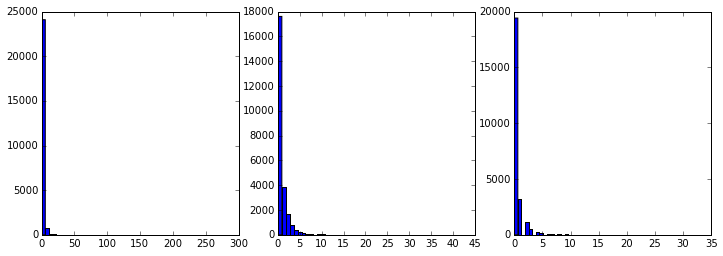

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].hist(excla, bins=50)[2]
ax[1].hist(inter, bins=50)[2]
ax[2].hist(susp, bins=50)[2]

In [135]:
u_excla = pd.unique(excla)
u_inter = pd.unique(inter)
u_susp = pd.unique(susp)

In [136]:
plot_excla = {}
plot_inter = {}
plot_susp = {}
dicts = [
    [np.array(plot_excla), sorted(u_excla), excla],
    [np.array(plot_inter), sorted(u_inter), inter], 
    [np.array(plot_susp), sorted(u_susp), susp]
]
for dic in dicts: 
    dic[0]={key: np.mean(data_train[1][np.where(dic[2]==key)]) for key in dic[1]}

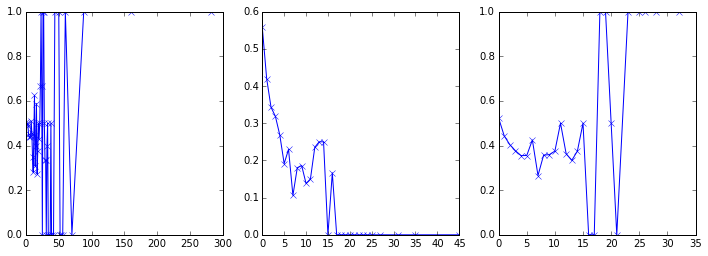

In [290]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i in range(3) :
    ax[i].plot(*zip(*sorted(dicts[i][0].items())), marker="x")

In [ ]:
fig = plt.figure(figsize=(12,4))
colors = [str(1-(quantity[i])/max(quantity)) for i in range(len(smiley_names))]
barlist = plt.bar(left=range(len(smiley_names)), height=proba_smiley, zorder=1, edgecolor="k", color=colors)
plt.hlines(y=0.5, xmin =0, xmax=len(smiley_names), colors = "red", lw=3, alpha=0.8, zorder=2)
plt.xticks(range(len(smiley_names)),smiley_names, rotation=90, fontsize=12)

Le nombre de points d'interrogation semblent corrélés avec la bonne / mauvaise opinion

In [217]:
happy = [":-)", ":)", ":D", ":o)", ":]", ":3", ":c)", ":>", "=]", "8)", "=)", ":}", ":^)", ":-))", "^^"]
laughing = [":-D", "8-D", "8D", "x-D", "xD", "X-D", "XD", "=-D", "=D", "=-3", "=3", "B^D"]
sad = [">:[", ":-(", ":(", ":-c", ":c", ":-<", ":<", ":-[", ":[", ":{", ";("]
cry = [":'-(", ":'("]
happy_cry = [":'-)", ":')"]
horror = ["D:<", "D:", "D8", "D;", "D=", "DX", "v.v", "D-':"]
surprised = [">:O", ":-O", ":O", ":-o", ":o", "8-0", "O_O", "o-o", "O_o", "o_O", "o_o", "O-O"]
kiss= [":*", ":^*", "( '}{' )"]
wink = [";-)", ";)", "*-)", "*)", ";-]", ";]", ";D", ";^)", ":-"]
tongue = [">:P", ":-P", ":P", "X-P", "x-p", "xp", "XP", ":-p", ":p", "=p", ":-b", ":b", "d:"]
skeptical = [">:\ ".replace(" ", ""), ">:/", ":-/", ":-.", ":/", ":\ ".replace(" ", ""), "=/", "=\ ".replace(" ", ""), ":L", "=L", ":S", ">.<"]
neutral = [":|", ":-|"]
angel = ["O:-)", "0:-3", "0:3", "0:-)", "0:)", "0;^)"]
evil = [">:)", ">;)", ">:-)", "}:-)", "}:)", "3:-)", "3:)"]
high_five = ["o/\o", "^5", ">_>^ ^<_<"]
heart = ["<3"]
broken_hart = ["</3"]
angry = [":@"]
smiley_list = [
happy,
laughing,
sad,
cry,
happy_cry,
horror,
surprised,
kiss,
wink,
tongue,
skeptical,
neutral,
angel,
evil,
high_five,
heart,
broken_hart, 
angry]
smiley_names = [
"happy",
"laughing",
"sad",
"cry",
"happy_cry",
"horror",
"surprised",
"kiss",
"wink",
"tongue",
"skeptical",
"neutral",
"angel",
"evil",
"high_five",
"heart",
"broken_hart", 
"angry"
]

In [218]:
def gen_features_smiley(tokenized_text, smiley_list):
    features_smiley = np.zeros((len(tokenized_text),len(smiley_list)))
    for i, review in enumerate(tokenized_text):
        if i % 1000 == 0:
            print i
        for w in review :
            if len(w)<2 : 
                pass
            elif len(w)>5:
                pass
            for j, cat in enumerate(smiley_list):
                if w in cat:
                    features_smiley[i,j] = 1
    return features_smiley

In [219]:
features_smiley = gen_features_smiley(tokenized_reviews, smiley_list)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


In [205]:
for i in np.where(np.sum(features_smiley, axis=0) >10)[0]:
    print smiley_list[i]

[':-)', ':)', ':D', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':^)', ':-))', '^^']
[':-D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D', '=-3', '=3', 'B^D']
['>:[', ':-(', ':(', ':-c', ':c', ':-<', ':<', ':-[', ':[', ':{', ';(']
[';-)', ';)', '*-)', '*)', ';-]', ';]', ';D', ';^)', ':-']
['>:P', ':-P', ':P', 'X-P', 'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', 'd:']


In [220]:
quantity = np.sum(features_smiley, axis=0)

In [221]:
smiley_index=[np.where(features_smiley[:,i]==1) for i in range(len(smiley_names))]

In [222]:
for i, name in enumerate(smiley_names):
    print name, np.mean(data_train[1][smiley_index[i]]), quantity[i]

happy 0.666666666667 264.0
laughing 0.846153846154 13.0
sad 0.290322580645 31.0
cry 0.5 2.0
happy_cry nan 0.0
horror 0.285714285714 7.0
surprised 0.5 2.0
kiss nan 0.0
wink 0.542857142857 70.0
tongue 0.526315789474 19.0
skeptical 0.0 1.0
neutral nan 0.0
angel nan 0.0
evil nan 0.0
high_five nan 0.0
heart 1.0 1.0
broken_hart nan 0.0
angry nan 0.0


In [277]:
import matplotlib as mpl

In [223]:
proba_smiley = []
for i, name in enumerate(smiley_names):
    proba_smiley.append(np.mean(data_train[1][smiley_index[i]]))

In [ ]:
fig = pyplot.figure(figsize=(8, 3))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])
ax3 = fig.add_axes([0.05, 0.15, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

([<matplotlib.axis.XTick at 0x14d4e0d50>,
 <a list of 18 Text xticklabel objects>)

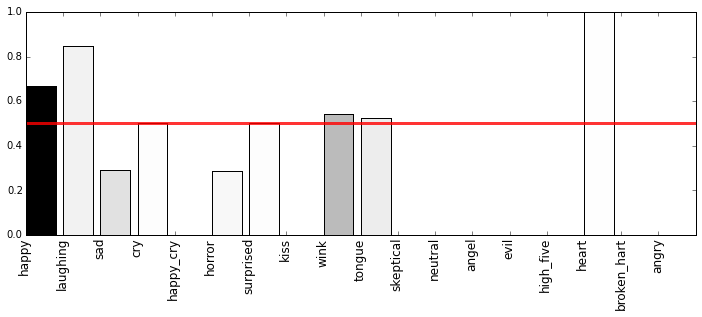

In [283]:
fig = plt.figure(figsize=(12,4))
colors = [str(1-(quantity[i])/max(quantity)) for i in range(len(smiley_names))]
mpl.colors.ListedColormap(colors)
barlist = plt.bar(left=range(len(smiley_names)), height=proba_smiley, zorder=1, edgecolor="k", color=colors)
plt.hlines(y=0.5, xmin =0, xmax=len(smiley_names), colors = "red", lw=3, alpha=0.8, zorder=2)
plt.xticks(range(len(smiley_names)),smiley_names, rotation=90, fontsize=12)

In [ ]:
plot_excla = {}
plot_inter = {}
plot_susp = {}
dicts = [
    [np.array(plot_excla), sorted(u_excla), excla],
    [np.array(plot_inter), sorted(u_inter), inter], 
    [np.array(plot_susp), sorted(u_susp), susp]
]
for dic in dicts: 
    dic[0]={key: np.mean(data_train[1][np.where(dic[2]==key)]) for key in dic[1]}

In [155]:
np.where(features_smiley[:,12] ==1)

(array([    0,     5,     8, ..., 24993, 24994, 24997]),)

In [200]:
for i in np.where(features_smiley[:,8] ==1)[0]:
    print data_train[0][i]


... than this ;-) What would happen if Terry Gilliam and Douglas Adams would have worked together on one movie? This movie starts with a touch of Brazil... when, at a certain point, the story moves straight into the twilight zone... bringing up nothing new, but just nothing... and nothing is great fun! When Dave and Andrew starts to explore their new environment the movie gets really enjoyable... bouncing heads? well... yes ;-) <br /><br />anyway... this movie was, imho, the biggest surprise at this year's FantasyFilmFest...<br /><br />Just like in Cube and Cypher Natali gave this one a minimalistic, weird but very special design, which makes it hard to locate the place of the story or its time... timeless somehow...
I don't know why the critics trashed this movie. I hardly ever agree with them anyway.<br /><br />The movie could have been a little scarier - I don't usually go to Horror movies! I even had to psych myself up to see it in the daytime. I needn't have bothered! ;) (The Cine

In [ ]:
np.zeros((len(tokenized_reviews),len(smiley_list)))